# Customer demand in a retail shop

For this exercise, we suggest to use `statsmodels` because it combines a simple API with a statistically elaborate analysis. You can find the documentation for the package [here](https://www.statsmodels.org/stable/index.html).

You can install the package by running
```bash
pip install statsmodels
```
(Make sure your BAML environment is active!)

An alternative is ``sklear.linear_model.LinearRegression``.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from sklearn.linear_model import LinearRegression # Alternative

## Data

The following table displays customer demand for a retail shop.

| t | Demand |
| - | - |
| 0 | 28.20 |
| 1 | 37.65 |
| 2 | 47.28 |
| 3 | 59.76 |
| 4 | 73.44 |
| 5 | 86.19 |
| 6 | 100.31 |
| 7 | 112.58 |
| 8 | 121.63 |

In [2]:
# These are already given in the exercise
data = pd.DataFrame([
    [0, 28.2], 
    [1, 37.65], 
    [2, 47.28], 
    [3, 59.76], 
    [4, 73.44], 
    [5, 86.19], 
    [6, 100.31], 
    [7, 112.58], 
    [8, 121.63]
], columns=["time", "demand"])

print(data)

   time  demand
0     0   28.20
1     1   37.65
2     2   47.28
3     3   59.76
4     4   73.44
5     5   86.19
6     6  100.31
7     7  112.58
8     8  121.63


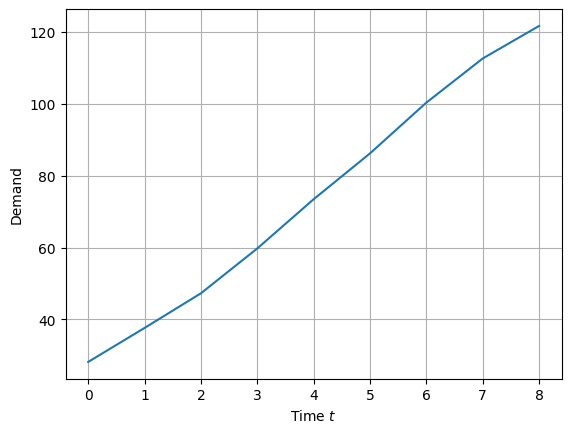

In [6]:
plt.plot(data["demand"])
plt.xlabel("Time $t$")
plt.ylabel("Demand")
plt.grid()

## Exercise a)

For the time series above, calculate the forecasted demand value for $t=10$ using simple linear regression and the formula below:

$$\hat{y}_t = \hat{\beta}_0 + \hat{\beta}_1\cdot t$$

In [7]:
# Add constant to the variables for intercept (if needed)
X = sm.add_constant(data["time"])
Y = data["demand"]

# Fit the model
model = sm.OLS(Y, X)
results = model.fit()
print("Coefficients:")
print(results.params)

# Predict demand for t=10
d10 = model.predict(results.params, [1, 10]).squeeze()  # Don't forget the constant!
print("Demand at t=10 :", round(float(d10.item()), 2))

Coefficients:
const    25.382222
time     12.183333
dtype: float64
Demand at t=10 : 147.22


In [31]:
# Workaround
time_avg = mean(data["time"])
b1 = ((1/len(data)) * sum(data["time"] * data["demand"]) - time_avg * mean(data["demand"])) / ((1/len(data) * sum(data["time"]**2 - time_avg**2)))
print(f"{b1:0.2f}")

12.18


In [30]:
b0 = mean(data["demand"]) - b1 * mean(data["time"])
print(f"{b0:0.2f}")

25.38


In [28]:
# More information, including t-test statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2249.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           4.85e-10
Time:                        15:09:10   Log-Likelihood:                -17.833
No. Observations:                   9   AIC:                             39.67
Df Residuals:                       7   BIC:                             40.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3822      1.223     20.752      0.0

/Users/jakobudovic/.pyenv/versions/3.10.6/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Exercise b)

Calculate the _RMSE_ and explain its meaning.

In [32]:
y_pred = model.predict(results.params, X)
RSS = np.sum((y_pred - data["demand"])**2)
MSE = RSS / len(y_pred)
RMSE = (MSE)**(0.5)

print(f"RMSE = {RMSE: .3f}")

RMSE =  1.755


**Solution b) Interpretation:**
The _RMSE_ is the average deviation of the prediction from the actual values of the data. It is useful for comparing different statistical (including machine learning) models for numerical prediction.

## Exercise c)

For the time series above, calculate the forecasted demand value for $t=10$, assuming a biannual _seasonal component_ of the following form: Starting from the first period $t=0$, suppose after every second period a new year begins. Make use of the formula below:
$$\hat{y}_t = \hat{\beta}_0 + \hat{\beta}_1\cdot t + \hat{\beta}_2\cdot Q_1$$

In [ ]:
# Add seasonal component as binary variable
Q = np.ones(len(data))
data["season"] = np.ones(len(data))
data["season"][1::2] = 0
print(data)

# Select input variables and add constant
X = sm.add_constant(data[["time", "season"]])
Y = data["demand"]

# Fit the model
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

In [ ]:
# Predict at t = 10 (season = 1)
x_new = np.array([1, 10, 1])    # Don't forget the constant here!
d10 = model.predict(results.params, x_new)
print(f"Prediction for t = 10: {d10: .2f}")

## Exercise d)
Does the data reflect biannual data?

**Solution d**

No, because the seasonal variable is not statistically significant. (t-value is 0.088 according to statsmodels.)